<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the flower_types dataset and print the first five observations

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
pd.get_dummies(df,columns=['species'],drop_first=True).head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The Skewness for distribution curve of sepal length is 0.3149109566369728


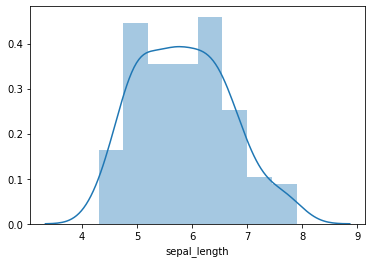

In [11]:
skew= df['sepal_length'].skew()
print('The Skewness for distribution curve of sepal length is',skew)
sns.distplot(df['sepal_length'])
plt.show()

The Skewness for distribution curve of log transform of sepal length is 0.043593975574027555
The Skewness for distribution curve of square root transform of sepal length is 0.1778529008514261


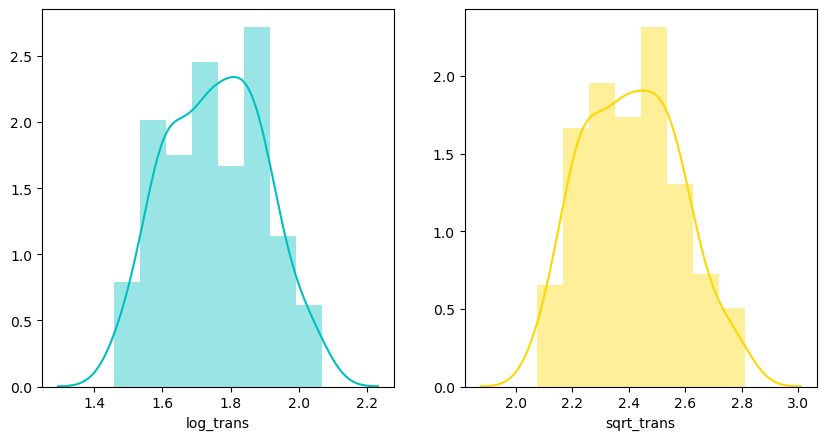

In [17]:
df1=df.copy()
df1['log_trans']=np.log(df1['sepal_length'])
df1['sqrt_trans']=np.sqrt(df1['sepal_length'])
fig,ax=plt.subplots(1,2,figsize=(10,5),dpi=100)
sns.distplot(df1['log_trans'],color='c',ax=ax[0])
sns.distplot(df1['sqrt_trans'],color='gold',ax=ax[1])
print('The Skewness for distribution curve of log transform of sepal length is',df1['log_trans'].skew())
print('The Skewness for distribution curve of square root transform of sepal length is',df1['sqrt_trans'].skew())
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

the original range for petal width is 2.4
the transformed range for petal width is 1.0


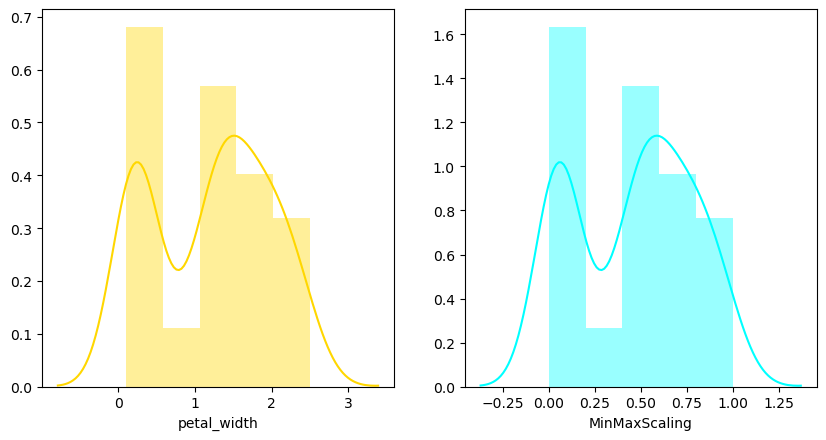

In [22]:
range_=df1['petal_width'].max()- df1['petal_width'].min()
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df1['MinMaxScaling']=MMS.fit_transform(df1[['petal_width']])
trange=df1['MinMaxScaling'].max() - df1['MinMaxScaling'].min()
fig,ax=plt.subplots(1,2,figsize=(10,5),dpi=100)
sns.distplot(df1['petal_width'],color='gold',ax=ax[0])
sns.distplot(df1['MinMaxScaling'],color='cyan',ax=ax[1])
print('the original range for petal width is' , range_)
print('the transformed range for petal width is' , trange)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
corr_matrix=df.corr()
bool_matrix=cmatrix>0.8
bool_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,True,False,True,True
sepal_width,False,True,False,False
petal_length,True,False,True,True
petal_width,True,False,True,True


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

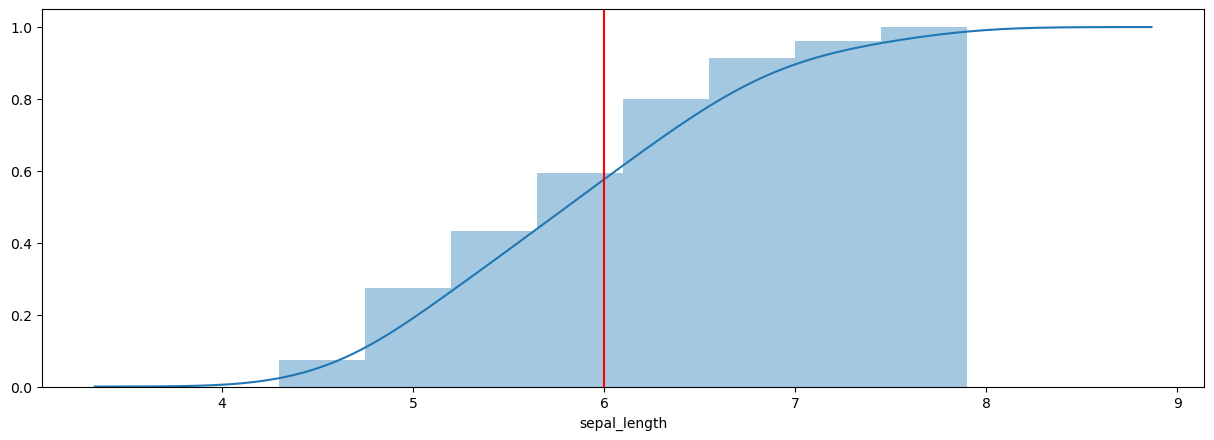

In [5]:
plt.figure(figsize=(15,5),dpi=100)
sns.distplot(df.sepal_length,hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.axvline(x=6,color='red')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1['species_LE'] = LE.fit_transform(df1['species'])
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,log_trans,sqrt_trans,MinMaxScaling,species_LE
0,5.1,3.5,1.4,0.2,setosa,1.629241,2.258318,0.041667,0
1,4.9,3.0,1.4,0.2,setosa,1.589235,2.213594,0.041667,0
2,4.7,3.2,1.3,0.2,setosa,1.547563,2.167948,0.041667,0
3,4.6,3.1,1.5,0.2,setosa,1.526056,2.144761,0.041667,0
4,5.0,3.6,1.4,0.2,setosa,1.609438,2.236068,0.041667,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

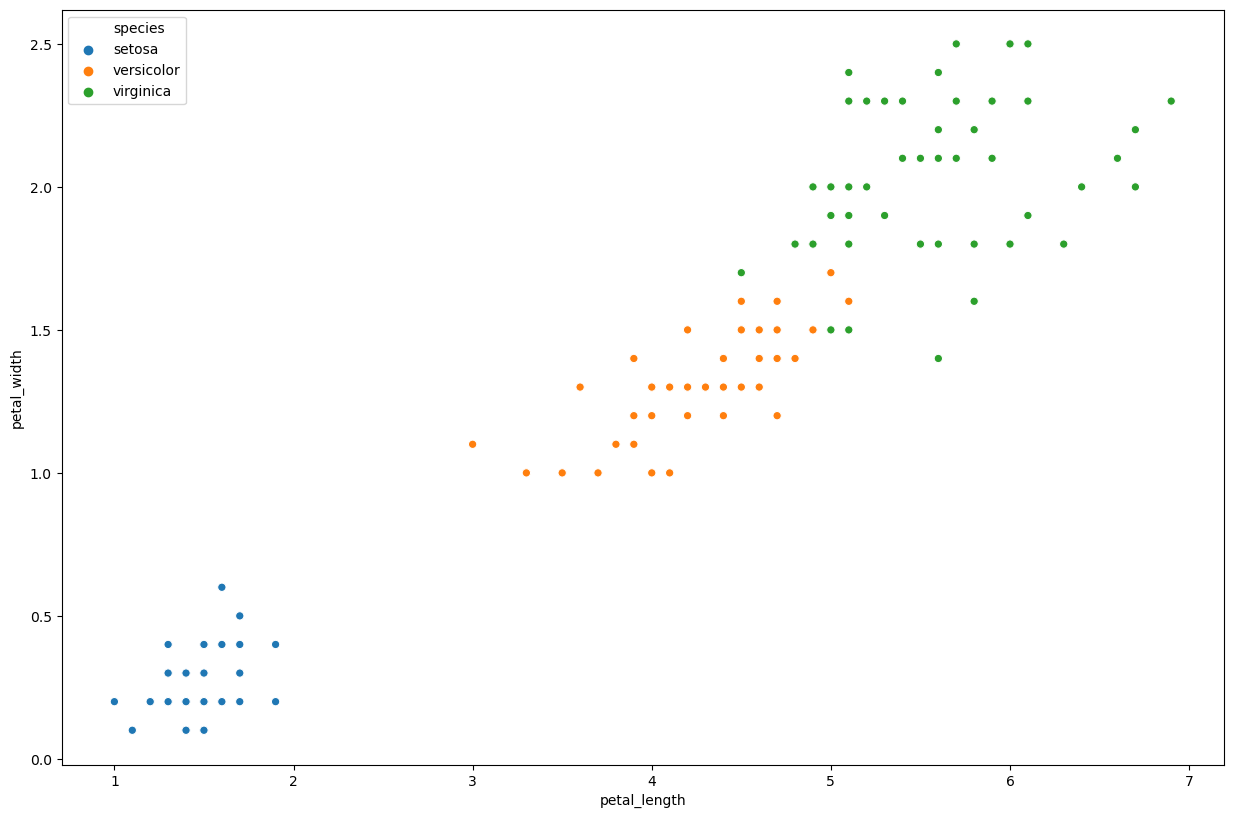

In [4]:
plt.figure(figsize=(15,10),dpi=100)
sns.scatterplot(data = df ,x='petal_length' , y='petal_width' , hue='species')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

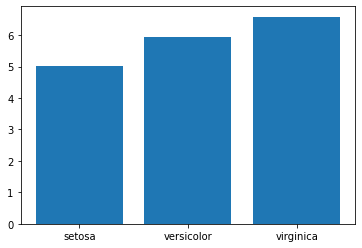

In [16]:
plt.bar(df['sepal_length'].groupby(df['species']).mean().index,df['sepal_length'].groupby(df['species']).mean().values)
plt.show()